### 1. 확률 분포의 묘사

1) 정의 : 확률 분포는 어떤 사건에 어느 정도의 확률이 할당되었는지를 묘사한 것

2) 묘사

[1] 일반적으로 확률분포는 구간으로 설정하여 구할 수 있음

$$ P(\{ a \leq x < b \}) = P(a, b) $$

[2] 하지만 두개의 숫자가 주어지면 이차원 함수를 구현해야 하기 때문에 불편함

$$\{ 1 < X < 2 \} $$

[3] 여기서 나온 아이디어가 구간의 시작을 $-\infty$로 통일 하는 것

$$\{ 1 < X \} = \{ -\infty \leq X < 1 \}$$

$$\{ X < 2 \} = \{ -\infty \leq X < 2 \}$$

[4] 이차원에서 일차원 함수간의 차이로 바뀌면서 계산이 용이해짐

$$\{ 1 < X < 2 \} = \{ -\infty \leq X < 2 \} - \{ -\infty \leq X < 1 \}$$

### 2. 누적 확률 분포 (Cumulative distribution function, CDF)

1) 정의

$$ F(x) = P(\{X < x\}) $$

2) 특징

[1] $F(-\infty) = 0$

[2] $F(+\infty) = 1$

[3] $F(x) \geq F(y) \;\; \text{ if } \;\; x > y $

3) 예시 (시계 바늘)

$$ F(0) = P(\{ -\infty {}^{\circ} \leq \theta < 0 {}^{\circ} \}) = 0 $$

$$ F(10) = P(\{ -\infty {}^{\circ} \leq \theta < 10 {}^{\circ} \}) = \dfrac{1}{36} $$

$$ \vdots $$

$$ F(360) = P(\{ -\infty {}^{\circ} \leq \theta < 360 {}^{\circ} \}) = 1 $$

$$ F(370) = P(\{ -\infty {}^{\circ} \leq \theta < 370 {}^{\circ} \}) = 1 $$

$$ \vdots $$

In [2]:
# CDF 그려보기 (시계 바늘)
import matplotlib as mpl
import matplotlib.pyplot as plt

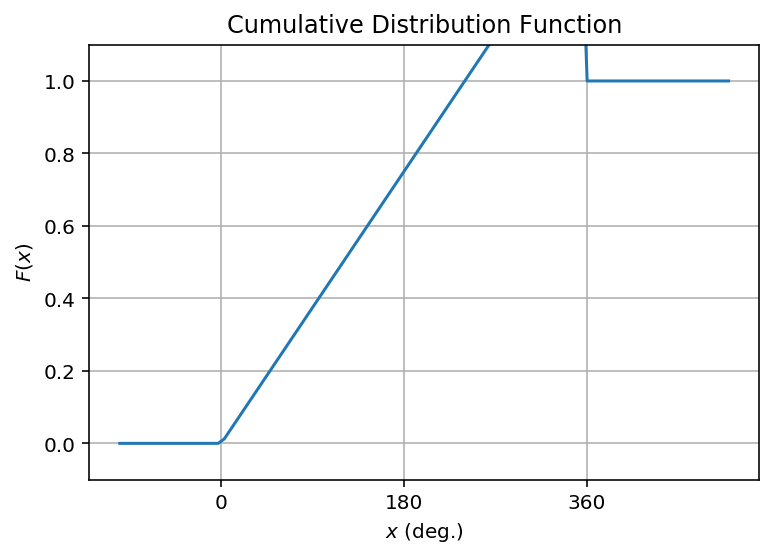

In [14]:
t = np.linspace(-100, 500, 100) # x축 구간 설정
F = t / 240 # 구간별 F값
F[t < 0] = 0 # 구간은 0~360까지 값을 가짐
F[t > 360] = 1

plt.ylim(-0.1, 1.1)
plt.xticks([0, 180, 360])
plt.title("Cumulative Distribution Function")
plt.xlabel("$x$ (deg.)")
plt.ylabel("$F(x)$")
plt.grid(True)

plt.plot(t, F)
plt.show()

### 3. 확률 밀도 함수 (Probability density function, PDF)

1) 정의

[1] CDF를 미분

$$ \dfrac{dF(x)}{dx} = f(x) $$

[2] 구간의 합 (적분)

$$ F(x) = \int_{-\infty}^{x} f(u) du $$

- CDF는 어떤 확률 변수 값이 더 자주 나오는지에 대한 정보를 알기 힘듦
- 이를 보완하기 위해 상대적인 확률 분포 형태만을 보기 위해 만들어짐
- 확률밀도 함수는 CDF를 미분하면 CDF의 기울기가 나오는데 이 기울기가 그 구간에 얼마나 많은 자료가 분포해 있는지를 알려줌

2) 특징

[1] $-\infty$ 부터 $\infty$ 까지 적분하면 그 값은 1

$$ \int_{-\infty}^{\infty} f(u)du = 1$$

[2] 0보다 같거나 큼 ($\because$ cdf에선 기울기가 0이상이기 때문)

$$ f(x) \geq 0 $$

3) 예시 (시계 바늘)

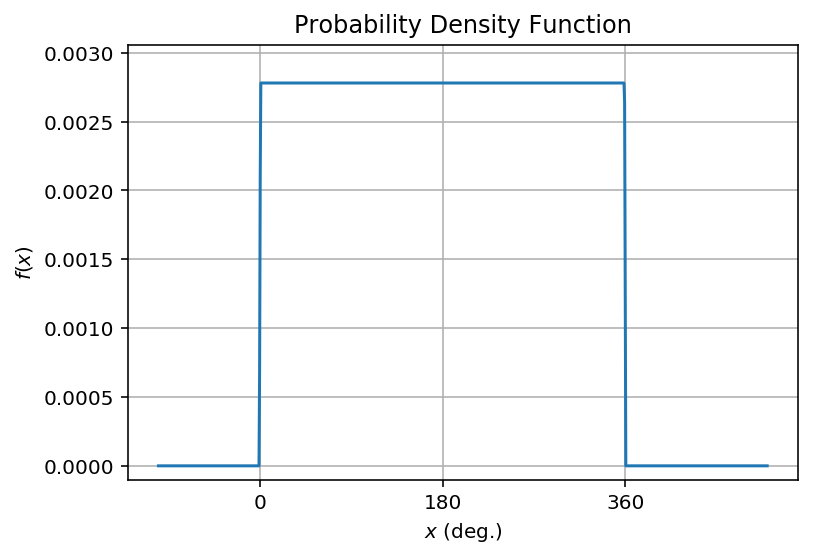

In [3]:
# CDF를 미분하여 구하기
t = np.linspace(-100, 500, 1000)
F = t / 360
F[t < 0] = 0
F[t > 360] = 1
f = np.gradient(F, 600/1000)  # 수치미분

plt.ylim(-0.0001, f.max()*1.1)
plt.xticks([0, 180, 360]);
plt.title("Probability Density Function");
plt.xlabel("$x$ (deg.)");
plt.ylabel("$f(x)$");
plt.grid(True)

plt.plot(t, f)
plt.show()

### 확률 질량 함수 (Probability mass function, PMF)

1) 정의 : 이산 확률 변수의 가능한 값 하나 하나에 대해 확률을 정의 한 함수

2) 예시 : 주사위 분포도

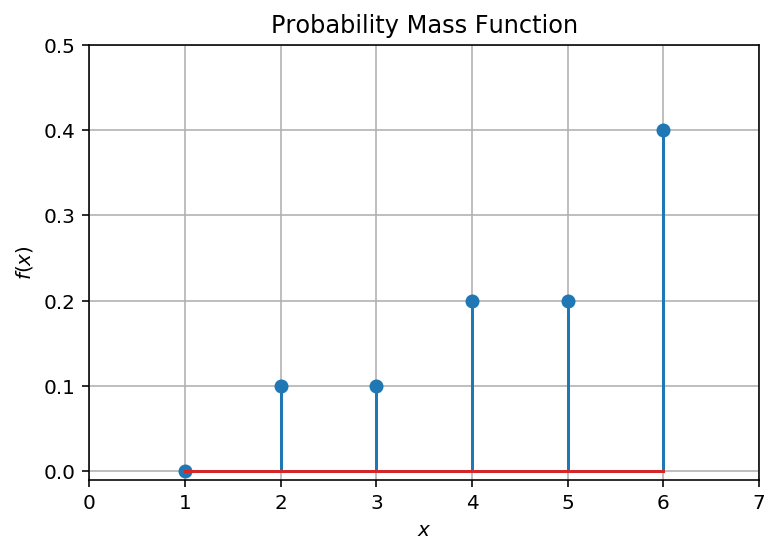

In [4]:
x = np.arange(1,7) # 1~6 숫자 설정
y = np.array([0.0, 0.1, 0.1, 0.2, 0.2, 0.4]) # 각 숫자별 확률 설정

plt.xlim(0, 7)
plt.ylim(-0.01, 0.5)

plt.title("Probability Mass Function");
plt.xlabel("$x$");
plt.ylabel("$f(x)$");
plt.grid(True)

plt.stem(x, y) # 확률 질량 함수
plt.show()

3) CDF를 구하기

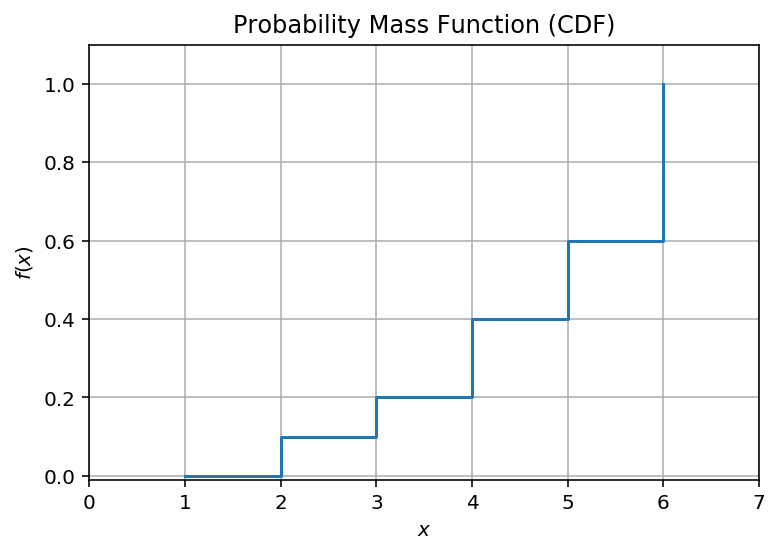

In [5]:
x = np.arange(1,7)
y = np.array([0.0, 0.1, 0.1, 0.2, 0.2, 0.4])
z = np.cumsum(y) # 확률 질량함수의 누적 확률 분포

plt.xlim(0, 7);
plt.ylim(-0.01, 1.1)

plt.title("Probability Mass Function (CDF)");
plt.xlabel("$x$");
plt.ylabel("$f(x)$");
plt.grid(True)

plt.step(x, z, where="post");
plt.show()